In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('loan_predic_train.csv')
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


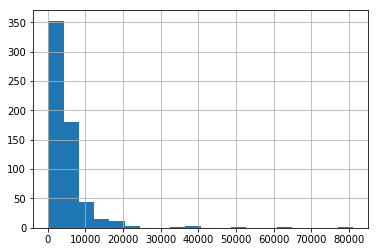

In [10]:
dataset['ApplicantIncome'].hist(bins=20)

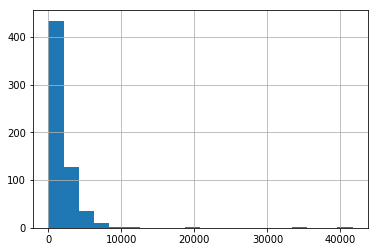

In [11]:
dataset['CoapplicantIncome'].hist(bins=20)

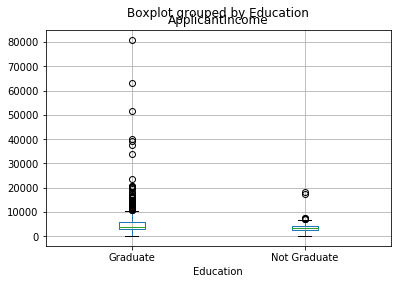

In [14]:
#Plotting Boxplot to check outliers
dataset.boxplot(column='ApplicantIncome', by= 'Education')

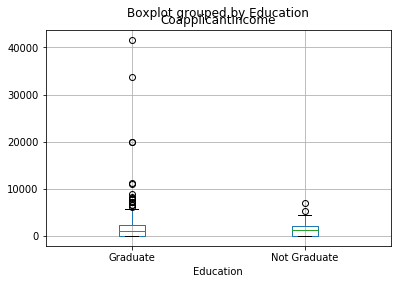

In [15]:
#Plotting Boxplot to check outliers
dataset.boxplot(column='CoapplicantIncome', by= 'Education')

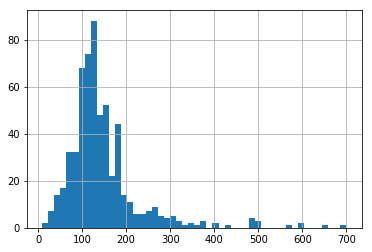

In [16]:
dataset['LoanAmount'].hist(bins = 50)

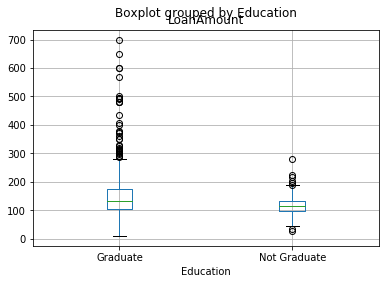

In [19]:
#Checking for outliers
dataset.boxplot(column = 'LoanAmount',  by = 'Education')

In [26]:
import seaborn as sns

/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


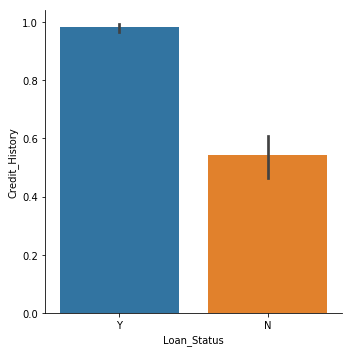

In [29]:
# how loan_status is dependent on credit history
sns.catplot(x = 'Loan_Status', y = 'Credit_History' , kind="bar", data=dataset)

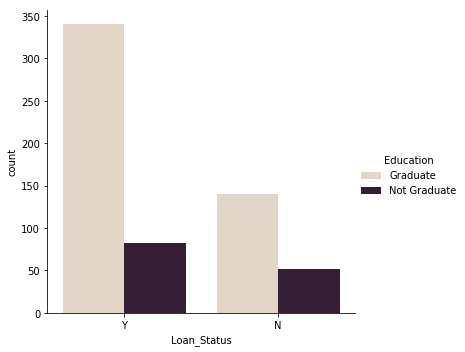

In [68]:
# how loan_status is dependent on Education
sns.catplot(x= 'Loan_Status', hue = 'Education', palette="ch:.25", kind = "count", data = dataset)

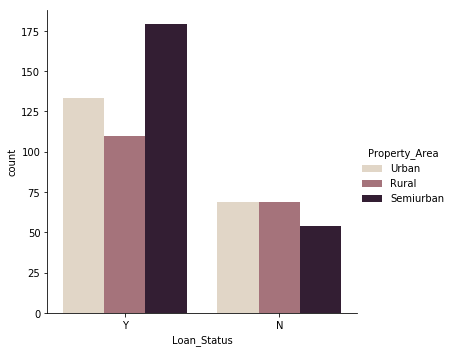

In [69]:
# how loan_status is dependent on Property Area
sns.catplot(x= 'Loan_Status', hue = 'Property_Area', palette="ch:.25", kind = "count", data = dataset)

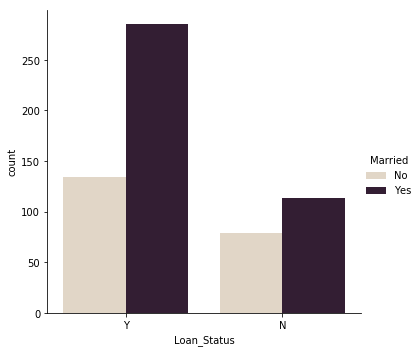

In [72]:
# how loan_status is dependent on marrital status
sns.catplot(x= 'Loan_Status', hue = 'Married', palette="ch:.25", kind = "count", data = dataset)

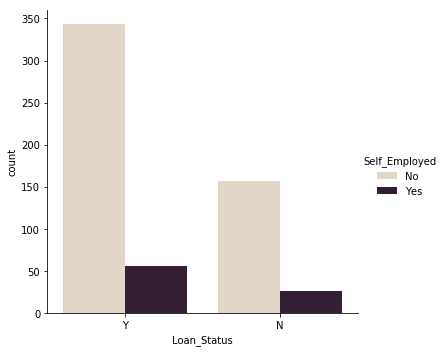

In [73]:
# how loan_status is dependent on slef employment
sns.catplot(x= 'Loan_Status', hue = 'Self_Employed', palette="ch:.25", kind = "count", data = dataset)

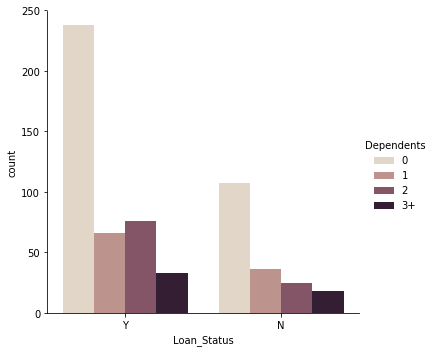

In [74]:
# how loan_status is dependent on number of dependents
sns.catplot(x= 'Loan_Status', hue = 'Dependents', palette="ch:.25", kind = "count", data = dataset)

In [75]:
#Checking for missing values for each variables
dataset.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

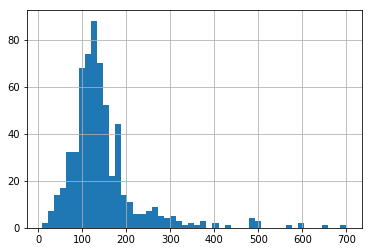

In [80]:
#Imputing mean value to the Loan Amount

dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean(), inplace=True)
dataset['LoanAmount'].hist(bins = 50)

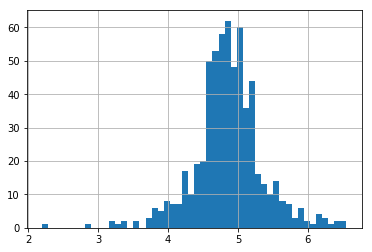

In [81]:
# Treating the outlier in the loan amount with log transformation
dataset['LoanAmount'] = np.log(dataset['LoanAmount'])
dataset['LoanAmount'].hist(bins = 50)

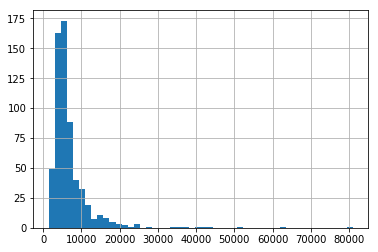

In [82]:
#Similarly for the Income, Adding all the income and 
dataset['TotalIncome'] = dataset['ApplicantIncome']+ dataset['CoapplicantIncome']
dataset['TotalIncome'].hist(bins = 50)

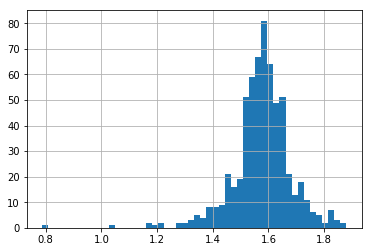

In [83]:
#Applying Log Transformation
dataset['TotalIncome'] = np.log(dataset['LoanAmount'])
dataset['TotalIncome'].hist(bins = 50)